<a href="https://colab.research.google.com/github/Sahaswari/Canny-Edge-Detection-in-Computer-Vision-and-Image-Processing/blob/main/Canny_Edge_Detection_in_Computer_Vision_and_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import tkinter as tk
from tkinter import filedialog

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import tkinter as tk
from tkinter import filedialog

# Function to open file dialog and select an image
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.png;*.jpeg;*.bmp;*.tiff")])
    return file_path

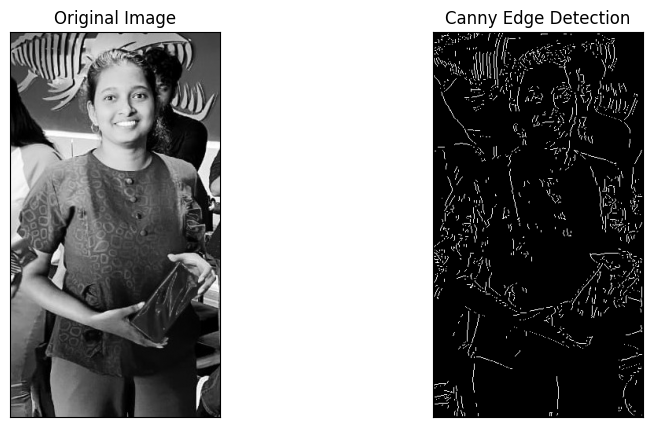

In [18]:
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Noise Reduction
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Gradient Calculation
gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Step 3: Non-Maximum Suppression
rows, cols = gradient_magnitude.shape
non_max_suppressed = np.zeros((rows, cols), dtype=np.uint8)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        direction = gradient_direction[i, j]
        if (0 <= direction < np.pi/8) or (15*np.pi/8 <= direction <= 2*np.pi):
            neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]
        elif (np.pi/8 <= direction < 3*np.pi/8):
            neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]
        elif (3*np.pi/8 <= direction < 5*np.pi/8):
            neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
        elif (5*np.pi/8 <= direction < 7*np.pi/8):
            neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]
        else:
            neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]

        if gradient_magnitude[i, j] >= max(neighbors):
            non_max_suppressed[i, j] = gradient_magnitude[i, j]

# Step 4: Double Thresholding
high_threshold = 100
low_threshold = 50
strong_edges = (non_max_suppressed > high_threshold)
weak_edges = (non_max_suppressed >= low_threshold) & (non_max_suppressed <= high_threshold)

# Step 5: Edge Tracking by Hysteresis
edges = np.zeros((rows, cols), dtype=np.uint8)
edges[strong_edges] = 255
for i in range(1, rows-1):
    for j in range(1, cols-1):
        if weak_edges[i, j]:
            if (strong_edges[i-1:i+2, j-1:j+2].any()):
                edges[i, j] = 255

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    rows, cols = gradient_magnitude.shape
    non_max_suppressed = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            direction = gradient_direction[i, j]
            if (0 <= direction < np.pi/8) or (15*np.pi/8 <= direction <= 2*np.pi):
                neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]
            elif (np.pi/8 <= direction < 3*np.pi/8):
                neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]
            elif (3*np.pi/8 <= direction < 5*np.pi/8):
                neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
            elif (5*np.pi/8 <= direction < 7*np.pi/8):
                neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]
            else:
                neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]

            if gradient_magnitude[i, j] >= max(neighbors):
                non_max_suppressed[i, j] = gradient_magnitude[i, j]

    high_threshold = 100
    low_threshold = 50
    strong_edges = (non_max_suppressed > high_threshold)
    weak_edges = (non_max_suppressed >= low_threshold) & (non_max_suppressed <= high_threshold)

    edges = np.zeros((rows, cols), dtype=np.uint8)
    edges[strong_edges] = 255
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if weak_edges[i, j]:
                if (strong_edges[i-1:i+2, j-1:j+2].any()):
                    edges[i, j] = 255

    return edges

demo = gr.Interface(
    fn=canny_edge_detection,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Image(type="numpy"),
    title="Canny Edge Detection",
    description="Upload an image to apply Canny Edge Detection."
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f355aef0aea13771c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
